In [15]:
!pip install apriori_python
!pip install apyori
!pip install efficient_apriori
!pip install fpgrowth_py

In [61]:
import pandas as pd
import time
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

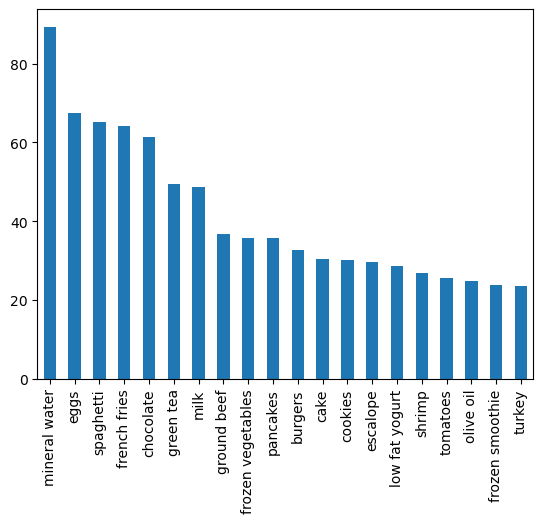

In [63]:
data.stack().value_counts()[:20].apply(lambda item: item / 20).plot(kind='bar');

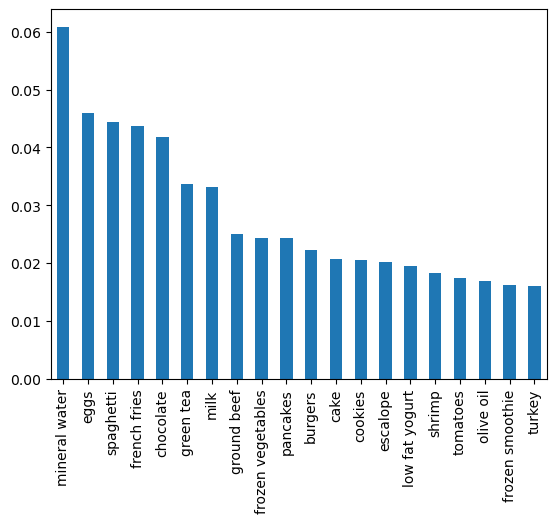

In [64]:
data.stack().value_counts(normalize=True)[:20].plot(kind='bar');

In [65]:
transactions = []
for i in range(data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    transactions.append(row)

In [66]:
from apriori_python import apriori
t = {}
start = time.perf_counter()
t1, rules = apriori(transactions, minSup = 0.04, minConf = 0.05)
time1 = (time.perf_counter() - start)
t['t1'] = time1

In [67]:
rules

[[{'mineral water'}, {'ground beef'}, 0.17170022371364654],
 [{'mineral water'}, {'milk'}, 0.20134228187919462],
 [{'mineral water'}, {'eggs'}, 0.21364653243847875],
 [{'mineral water'}, {'chocolate'}, 0.220917225950783],
 [{'mineral water'}, {'spaghetti'}, 0.2505592841163311],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]

In [24]:
from apyori import apriori
start = time.perf_counter()
rules = apriori(transactions=transactions,
                min_support=0.04,
                min_confidence=0.05,
                mini_lift=1.1)

results = list(rules)
time2 = (time.perf_counter() - start)
t['t2'] = time2

In [25]:
for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print(f"Support: {0}; Confidence: {1}; Lift: {2};".format(result[1], subset[2],subset[3]))

frozenset() frozenset({'burgers'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'cake'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'chicken'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'chocolate'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'cookies'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'cooking oil'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'eggs'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'escalope'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'french fries'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'frozen smoothie'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'frozen vegetables'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'grated cheese'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'green tea'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'ground beef'})
Suppor

In [26]:
from efficient_apriori import apriori
start = time.perf_counter()
itemsets, rules = apriori(transactions, min_support = 0.04, min_confidence = 0.05)
time3 = (time.perf_counter() - start)
t['t3'] = time3
for i in range(len(rules)):
    print(rules[i])

{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.348, conv: 1.073)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.348, conv: 1.122)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{mineral water} -> {ground beef} (conf: 0.172, supp: 0.041, lift: 1.748, conv: 1.089)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.305)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.439, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.439, conv: 1.102)


In [27]:
from fpgrowth_py import fpgrowth
start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio = 0.04, minConf = 0.05)
time4 = (time.perf_counter() - start)
t['t4'] = time4

for i in range(len(rules)):
    print(rules[i])

[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
[{'mineral water'}, {'ground beef'}, 0.17170022371364654]
[{'mineral water'}, {'milk'}, 0.20134228187919462]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'mineral water'}, {'chocolate'}, 0.220917225950783]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
[{'mineral water'}, {'spaghetti'}, 0.2505592841163311]
[{'eggs'}, {'mineral water'}, 0.28338278931750743]
[{'mineral water'}, {'eggs'}, 0.21364653243847875]


{'t1': 0.8887982999999622, 't2': 0.01436920000014652, 't3': 0.010892299999795796, 't4': 0.2189687000000049}


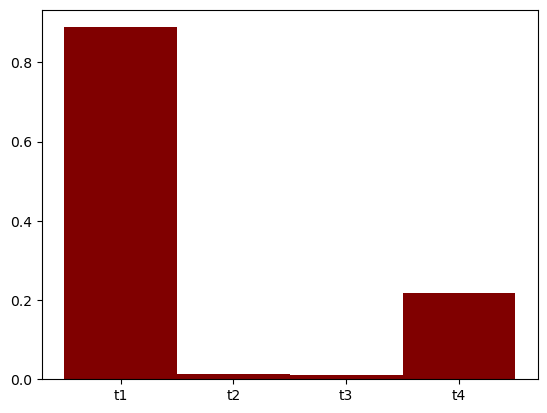

In [35]:
print(t)
plt.bar(t.keys(), t.values(), 1, color='maroon');

In [79]:
data = pd.read_csv('data.csv', header=None)

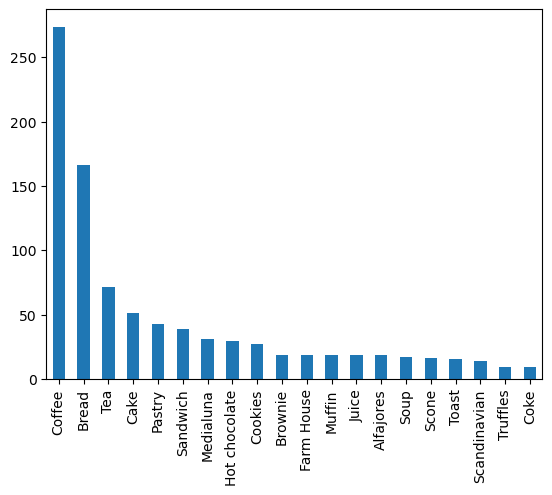

In [80]:
data.stack().value_counts()[:20].apply(lambda item: item / 20).plot(kind='bar');

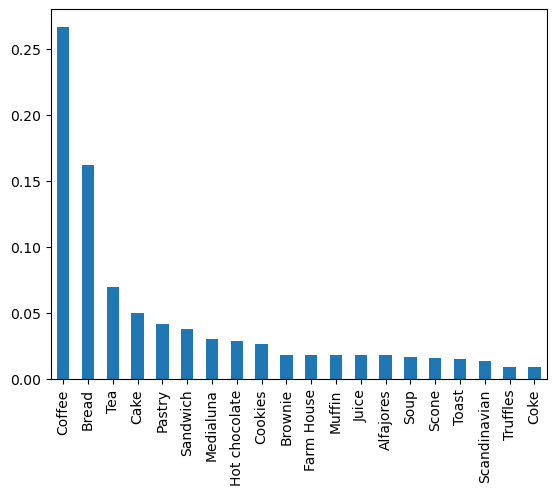

In [81]:
data.stack().value_counts(normalize=True)[:20].plot(kind='bar');

In [82]:
transactions = []
for i in range(data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    transactions.append(row)

In [83]:
from apriori_python import apriori
t = {}
start = time.perf_counter()
t1, rules = apriori(transactions, minSup = 0.035, minConf = 0.04)
time1 = (time.perf_counter() - start)
t['t1'] = time1

In [84]:
rules

[[{'Coffee'}, {'Sandwich'}, 0.0799469964664311],
 [{'Coffee'}, {'Pastry'}, 0.09938162544169611],
 [{'Coffee'}, {'Tea'}, 0.10424028268551237],
 [{'Coffee'}, {'Cake'}, 0.11439929328621908],
 [{'Coffee'}, {'Bread'}, 0.1881625441696113],
 [{'Bread'}, {'Coffee'}, 0.27510494026477234],
 [{'Tea'}, {'Coffee'}, 0.3496296296296296],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Sandwich'}, {'Coffee'}, 0.5323529411764706],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037]]

In [85]:
from apyori import apriori
start = time.perf_counter()
rules = apriori(transactions=transactions,
                min_support=0.04,
                min_confidence=0.04,
                mini_lift=1.1)

results = list(rules)
time2 = (time.perf_counter() - start)
t['t2'] = time2

In [86]:
for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print(f"Support: {0}; Confidence: {1}; Lift: {2};".format(result[1], subset[2],subset[3]))

frozenset() frozenset({'Bread'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'Cake'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'Coffee'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'Cookies'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'Hot chocolate'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'Medialuna'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'Pastry'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'Sandwich'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'Tea'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'Bread', 'Coffee'})
Support: 0; Confidence: 1; Lift: 2;
frozenset({'Bread'}) frozenset({'Coffee'})
Support: 0; Confidence: 1; Lift: 2;
frozenset({'Coffee'}) frozenset({'Bread'})
Support: 0; Confidence: 1; Lift: 2;
frozenset() frozenset({'Cake', 'Coffee'})
Support: 0; Confidence: 1; Lift: 2;
frozenset({'Cake'}) frozenset({'Coffee'})
Suppor

In [87]:
from efficient_apriori import apriori
start = time.perf_counter()
itemsets, rules = apriori(transactions, min_support = 0.04, min_confidence = 0.04)
time3 = (time.perf_counter() - start)
t['t3'] = time3
for i in range(len(rules)):
    print(rules[i])

{Coffee} -> {Bread} (conf: 0.188, supp: 0.089, lift: 0.579, conv: 0.832)
{Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)
{Coffee} -> {Cake} (conf: 0.114, supp: 0.054, lift: 1.109, conv: 1.013)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Coffee} -> {Pastry} (conf: 0.099, supp: 0.047, lift: 1.162, conv: 1.015)
{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.736, conv: 0.807)
{Coffee} -> {Tea} (conf: 0.104, supp: 0.050, lift: 0.736, conv: 0.958)


In [88]:
from fpgrowth_py import fpgrowth
start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio = 0.04, minConf = 0.04)
time4 = (time.perf_counter() - start)
t['t4'] = time4

for i in range(len(rules)):
    print(rules[i])

[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Coffee'}, {'Cookies'}, 0.05896643109540636]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Coffee'}, {'Medialuna'}, 0.07354240282685512]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Coffee'}, {'Sandwich'}, 0.0799469964664311]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Coffee'}, {'Pastry'}, 0.09938162544169611]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Coffee'}, {'Cake'}, 0.11439929328621908]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]
[{'Coffee'}, {'Tea'}, 0.10424028268551237]
[{'Bread'}, {'Coffee'}, 0.27510494026477234]
[{'Coffee'}, {'Bread'}, 0.1881625441696113]


{'t1': 0.28055200000017066, 't2': 0.0069254000000000815, 't3': 0.004692500000146538, 't4': 0.08705549999967843}


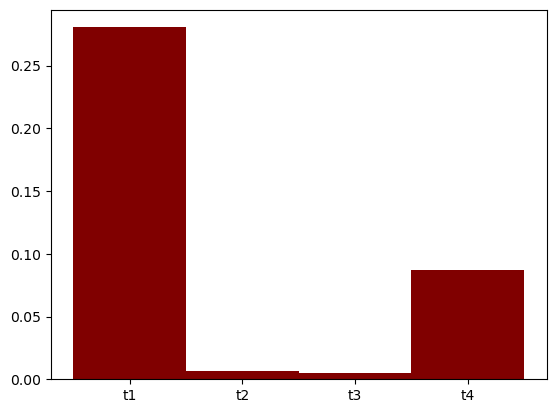

In [89]:
print(t)
plt.bar(t.keys(), t.values(), 1, color='maroon');